In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

## Data Cleaning

In [8]:
dataset = pd.read_csv('FSHQTCNVSV.csv')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OCCURR_ID   8490 non-null   object 
 1   TAXON_GRP   8490 non-null   object 
 2   SCIENCE_NM  8489 non-null   object 
 3   ENGLISH_NM  8490 non-null   object 
 4   ELCODE      8490 non-null   object 
 5   IN_BIOTICS  8490 non-null   object 
 6   BC_STATUS   8490 non-null   object 
 7   WS_CODE     8490 non-null   object 
 8   BCWSA_WBID  8490 non-null   object 
 9   BCWSA_TYPE  8490 non-null   object 
 10  GNIS_NAME   8490 non-null   object 
 11  LOCATNINFO  8490 non-null   object 
 12  UTM_ZONE    8490 non-null   int64  
 13  UTM_EAST    8490 non-null   int64  
 14  UTM_NORTH   8490 non-null   int64  
 15  ALB_EAST    8490 non-null   int64  
 16  ALB_NORTH   8490 non-null   int64  
 17  COL_DATE    7668 non-null   object 
 18  COL_DETAIL  8490 non-null   object 
 19  MISC_NOTES  8490 non-null  

In [10]:
# dropping all of unwanted columns
subset = dataset[['TAXON_GRP', 'COL_DATE', 'X','Y', 'UTM_ZONE']]

In [11]:
#removing rows with missing data
subset = subset.dropna()

In [12]:
subset.head(10)

,TAXON_GRP,COL_DATE,X,Y,UTM_ZONE
0,Fish,1996-06-18,-126.497540,49.803201,9
1,Fish,1997-06-19,-126.497540,49.803201,9
2,Fish,2001-06-23,-126.497540,49.803201,9
3,Algae,1989,-126.075168,49.824019,9
4,Fish,2011-04-20,-126.985278,49.887550,9
5,Fish,1996-06-18,-126.643981,49.912083,9
6,Fish,1997-06-19,-126.643981,49.912083,9
7,Fish,1998-06-20,-126.643981,49.912083,9
8,Fish,2002-06-24,-126.643981,49.912083,9
9,Fish,1989-06-11,-126.658381,49.924046,9


In [13]:
subset.to_csv('invasive_species_data.csv')

In [14]:
data = pd.read_csv('invasive_species_data.csv')

In [15]:
# setting the dependent and independent variables
y = data['TAXON_GRP']
x = data.drop(columns=['TAXON_GRP', 'Unnamed: 0'])

In [16]:
# encoding the date values using One hot
x_encoded = pd.get_dummies(x, columns=['COL_DATE'])
x_encoded.head()

,X,Y,UTM_ZONE,COL_DATE_,COL_DATE_1878-05,COL_DATE_1894?,COL_DATE_1897,COL_DATE_1897-07-30,COL_DATE_1898-06-15,COL_DATE_1899-07-27,COL_DATE_1903-07-01,COL_DATE_1903-09-11,COL_DATE_1904-07-29,COL_DATE_1905-05-17,COL_DATE_1908-05-01,COL_DATE_1909,COL_DATE_1911-06-06,COL_DATE_1911-06-16,COL_DATE_1911-07-23,COL_DATE_1912-12-05,COL_DATE_1913-06-01,COL_DATE_1913-07-18,COL_DATE_1913-07-20,COL_DATE_1913-07-27,COL_DATE_1913-09-01,COL_DATE_1913-09-13,COL_DATE_1913-09-21,COL_DATE_1913-12-01,COL_DATE_1914-06-21,COL_DATE_1915-07-08,COL_DATE_1915-07-13,COL_DATE_1916,COL_DATE_1917,COL_DATE_1917-07-01,COL_DATE_1920-08-18,COL_DATE_1922-08-18,COL_DATE_1923-05-19,COL_DATE_1924-04-17,COL_DATE_1925-07-01,COL_DATE_1928-07-08,...,COL_DATE_2013,COL_DATE_2013 (Jul,COL_DATE_2013-04-23,COL_DATE_2013-04-25,COL_DATE_2013-05-01,COL_DATE_2013-05-02,COL_DATE_2013-05-03,COL_DATE_2013-05-08,COL_DATE_2013-05-13,COL_DATE_2013-05-22,COL_DATE_2013-05-23,COL_DATE_2013-05-24,COL_DATE_2013-05-27,COL_DATE_2013-05-28,COL_DATE_2013-05-30,COL_DATE_2013-05-31,COL_DATE_2013-06-01,COL_DATE_2013-06-04,COL_DATE_2013-06-05,COL_DATE_2013-06-06,COL_DATE_2013-06-07,COL_DATE_2013-06-08,COL_DATE_2013-06-09,COL_DATE_2013-06-10,COL_DATE_2013-06-17,COL_DATE_2013-06-18,COL_DATE_2013-06-19,COL_DATE_2013-06-20,COL_DATE_2013-06-25,COL_DATE_2013-06-27,COL_DATE_2013-06-28,COL_DATE_2013-06-29,COL_DATE_2013-07-03,COL_DATE_2013-08-04,COL_DATE_2013-09-05,COL_DATE_2013-09-15,COL_DATE_2014,COL_DATE_Dec. 2012,COL_DATE_late 1980',COL_DATE_prior to F
0,-126.497540,49.803201,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-126.497540,49.803201,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-126.497540,49.803201,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-126.075168,49.824019,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-126.985278,49.887550,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# separating the data into: 60% train, 20% test and 20% validation
x_train_val, x_test, y_train_val, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=1)
y_train_val.shape

(6134,)

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=1)

In [19]:
evalset = [(x_train, y_train), (x_val, y_val)]

In [20]:
model = xgb.XGBClassifier(objective='reg:logistic', seed=42)
model.fit(x_train, y_train, eval_metric='mlogloss', eval_set=evalset)

[0]	validation_0-mlogloss:1.6239	validation_1-mlogloss:1.62559
[1]	validation_0-mlogloss:1.49336	validation_1-mlogloss:1.49653
[2]	validation_0-mlogloss:1.38271	validation_1-mlogloss:1.38774
[3]	validation_0-mlogloss:1.29041	validation_1-mlogloss:1.29627
[4]	validation_0-mlogloss:1.21171	validation_1-mlogloss:1.2187
[5]	validation_0-mlogloss:1.14322	validation_1-mlogloss:1.15125
[6]	validation_0-mlogloss:1.08403	validation_1-mlogloss:1.0935
[7]	validation_0-mlogloss:1.03032	validation_1-mlogloss:1.04046
[8]	validation_0-mlogloss:0.983679	validation_1-mlogloss:0.994706
[9]	validation_0-mlogloss:0.942272	validation_1-mlogloss:0.953229
[10]	validation_0-mlogloss:0.90383	validation_1-mlogloss:0.915508
[11]	validation_0-mlogloss:0.870102	validation_1-mlogloss:0.882447
[12]	validation_0-mlogloss:0.84016	validation_1-mlogloss:0.852512
[13]	validation_0-mlogloss:0.811991	validation_1-mlogloss:0.824773
[14]	validation_0-mlogloss:0.787337	validation_1-mlogloss:0.799601
[15]	validation_0-mlogloss

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [21]:
# performance evaluation
print(f'train score: {model.score(x_train, y_train)}')
print(f'validation score: {model.score(x_val, y_val)}')

train score: 0.8571739130434782
validation score: 0.8279009126466753


In [22]:
# plotting learning curve
results = model.evals_result()

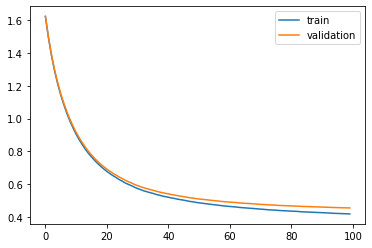

In [23]:
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='validation')
pyplot.legend()
pyplot.show()